<a href="https://colab.research.google.com/github/iamsoroush/DeepEEGAbstractor/blob/master/cv_rnr_4s_proposed_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title # Clone the repository and upgrade Keras {display-mode: "form"}

!git clone https://github.com/iamsoroush/DeepEEGAbstractor.git
!pip install --upgrade keras

Cloning into 'DeepEEGAbstractor'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 414 (delta 53), reused 59 (delta 33), pack-reused 333
Receiving objects: 100% (414/414), 27.54 MiB | 9.92 MiB/s, done.
Resolving deltas: 100% (260/260), done.
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [0]:
#@title # Imports {display-mode: "form"}

import os
import pickle
import sys
sys.path.append('DeepEEGAbstractor')

import numpy as np

from src.helpers import CrossValidator
from src.models import SpatioTemporalWFB, TemporalWFB, TemporalDFB, SpatioTemporalDFB
from src.dataset import DataLoader, Splitter, FixedLenGenerator

from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


tensorflow version:  1.14.0
Mounted at /content/gdrive


In [0]:
#@title # Set data path {display-mode: "form"}

#@markdown ---
#@markdown Type in the folder in your google drive that contains numpy _data_ folder:

parent_dir = 'soroush'#@param {type:"string"}
gdrive_path =  os.path.abspath(os.path.join('gdrive/My Drive', parent_dir))
data_dir = os.path.join(gdrive_path, 'data')
cv_results_dir = os.path.join(gdrive_path, 'cross_validation')
if not os.path.exists(cv_results_dir):
    os.mkdir(cv_results_dir)

print('Data directory: ', data_dir)
print('Cross validation results dir: ', cv_results_dir)

Data directory:  /content/gdrive/My Drive/soroush/data
Cross validation results dir:  /content/gdrive/My Drive/soroush/cross_validation


In [0]:
#@title ## Set Parameters

batch_size = 80
epochs = 50
k = 10
t = 10
instance_duration = 4 #@param {type:"slider", min:3, max:10, step:0.5}
instance_overlap = 1 #@param {type:"slider", min:0, max:3, step:0.5}
sampling_rate = 256 #@param {type:"number"}
n_channels = 20 #@param {type:"number"}
task = 'rnr'
data_mode = 'cross_subject'

  0%|          | 0/62 [00:00<?, ?it/s]


Loading data ...



100%|██████████| 62/62 [01:05<00:00,  1.18it/s]


Train-test indices generated.
time 1/10:
 step 1/10 ...
   training instances:  5228
   test instances:      638


 step 2/10 ...
   training instances:  5198
   test instances:      668
 step 3/10 ...
   training instances:  5182
   test instances:      684
 step 4/10 ...
   training instances:  5203
   test instances:      663
 step 5/10 ...
   training instances:  5184
   test instances:      682
 step 6/10 ...
   training instances:  5181
   test instances:      685
 step 7/10 ...
   training instances:  5394
   test instances:      472
 step 8/10 ...
   training instances:  5374
   test instances:      492
 step 9/10 ...
   training instances:  5444
   test instances:      422
 step 10/10 ...
   training instances:  5406
   test instances:      460
time 2/10:
 step 1/10 ...
   training instances:  5228
   test instances:      638
 step 2/10 ...
   training instances:  5198
   test instances:      668
 step 3/10 ...
   training instances:  5182
   test instances:      684
 step 4/1

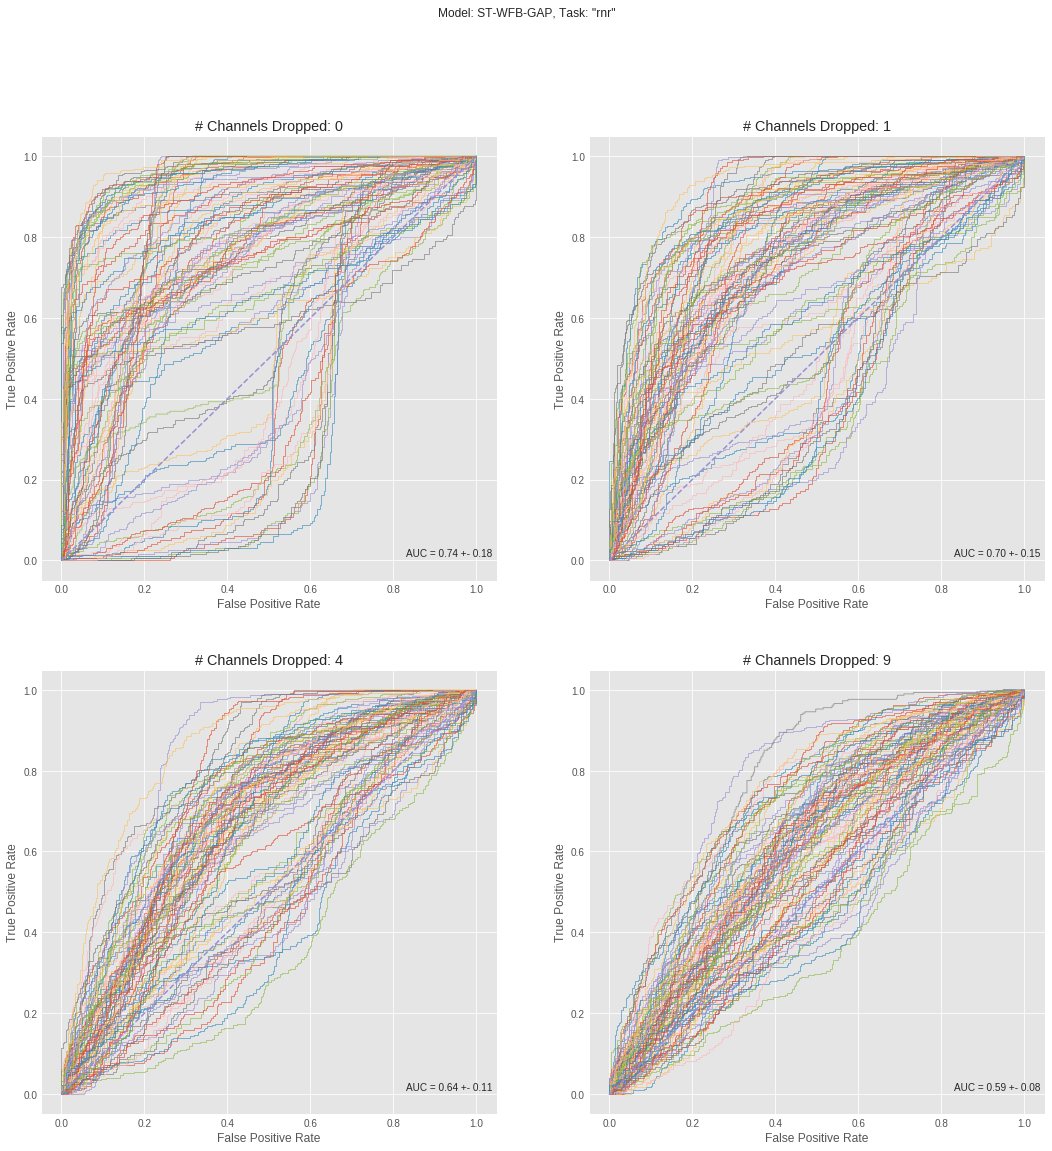

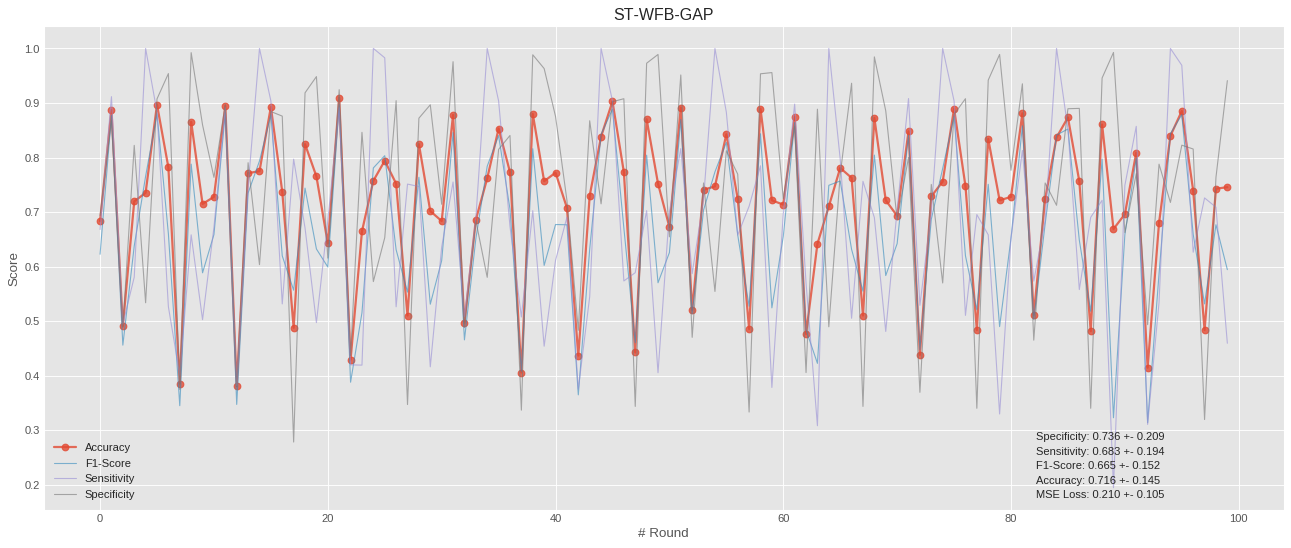

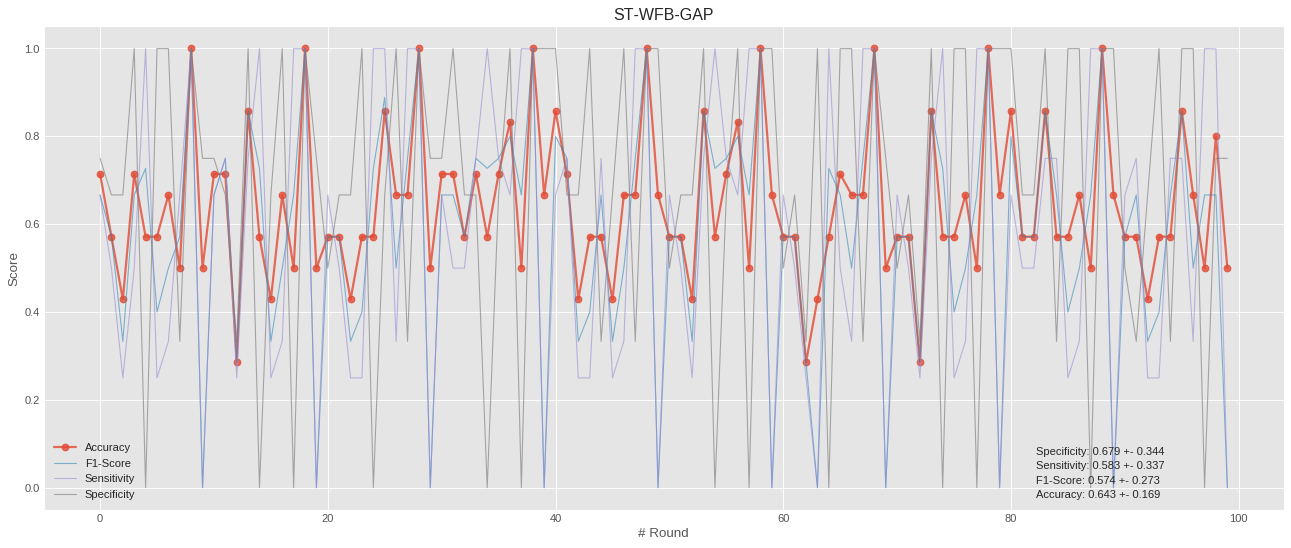

In [0]:
#@title ## Spatio-Temporal WFB

model_name = 'ST-WFB-GAP'

train_generator = FixedLenGenerator(batch_size=batch_size,
                                    duration=instance_duration,
                                    overlap=instance_overlap,
                                    sampling_rate=sampling_rate,
                                    is_train=True)

test_generator = FixedLenGenerator(batch_size=8,
                                   duration=instance_duration,
                                   overlap=instance_overlap,
                                   sampling_rate=sampling_rate,
                                   is_train=False)

params = {'task': task,
          'data_mode': data_mode,
          'main_res_dir': cv_results_dir,
          'model_name': model_name,
          'epochs': epochs,
          'train_generator': train_generator,
          'test_generator': test_generator,
          't': t,
          'k': k,
          'channel_drop': True}

validator = CrossValidator(**params)

dataloader = DataLoader(data_dir,
                        task,
                        data_mode,
                        sampling_rate,
                        instance_duration,
                        instance_overlap)
data, labels = dataloader.load_data()

input_shape = (sampling_rate * instance_duration,
               n_channels)

model_obj = SpatioTemporalWFB(input_shape,
                              model_name=model_name)

scores = validator.do_cv(model_obj,
                         data,
                         labels)

In [0]:
#@title ## Temporal WFB

model_name = 'T-WFB-GAP'

train_generator = FixedLenGenerator(batch_size=batch_size,
                                    duration=instance_duration,
                                    overlap=instance_overlap,
                                    sampling_rate=sampling_rate,
                                    is_train=True)

test_generator = FixedLenGenerator(batch_size=8,
                                   duration=instance_duration,
                                   overlap=instance_overlap,
                                   sampling_rate=sampling_rate,
                                   is_train=False)

params = {'task': task,
          'data_mode': data_mode,
          'main_res_dir': cv_results_dir,
          'model_name': model_name,
          'epochs': epochs,
          'train_generator': train_generator,
          'test_generator': test_generator,
          't': t,
          'k': k,
          'channel_drop': True}

validator = CrossValidator(**params)

dataloader = DataLoader(data_dir,
                        task,
                        data_mode,
                        sampling_rate,
                        instance_duration,
                        instance_overlap)
data, labels = dataloader.load_data()

input_shape = (sampling_rate * instance_duration,
               n_channels)

model_obj = TemporalWFB(input_shape,
                        model_name=model_name)

scores = validator.do_cv(model_obj,
                         data,
                         labels)

  3%|▎         | 2/62 [00:00<00:03, 16.49it/s]


Loading data ...



100%|██████████| 62/62 [00:02<00:00, 24.39it/s]


Train-test indices already exists.
time 1/10:
 step 1/10 ...
   training instances:  5228
   test instances:      638


 step 2/10 ...
   training instances:  5198
   test instances:      668
 step 3/10 ...
   training instances:  5182
   test instances:      684
 step 4/10 ...
   training instances:  5203
   test instances:      663
 step 5/10 ...
   training instances:  5184
   test instances:      682
 step 6/10 ...
   training instances:  5181
   test instances:      685
 step 7/10 ...
   training instances:  5394
   test instances:      472


In [0]:
#@title ## Spatio-Temporal DFB

model_name = 'ST-DFB-GAP'

train_generator = FixedLenGenerator(batch_size=batch_size,
                                    duration=instance_duration,
                                    overlap=instance_overlap,
                                    sampling_rate=sampling_rate,
                                    is_train=True)

test_generator = FixedLenGenerator(batch_size=8,
                                   duration=instance_duration,
                                   overlap=instance_overlap,
                                   sampling_rate=sampling_rate,
                                   is_train=False)

params = {'task': task,
          'data_mode': data_mode,
          'main_res_dir': cv_results_dir,
          'model_name': model_name,
          'epochs': epochs,
          'train_generator': train_generator,
          'test_generator': test_generator,
          't': t,
          'k': k,
          'channel_drop': True}

validator = CrossValidator(**params)

dataloader = DataLoader(data_dir,
                        task,
                        data_mode,
                        sampling_rate,
                        instance_duration,
                        instance_overlap)
data, labels = dataloader.load_data()

input_shape = (sampling_rate * instance_duration,
               n_channels)

model_obj = SpatioTemporalDFB(input_shape,
                              model_name=model_name)

scores = validator.do_cv(model_obj,
                         data,
                         labels)

In [0]:
#@title ## Spatio-Temporal DFB (Normalized Kernels)

model_name = 'ST-DFB-NK-GAP'

train_generator = FixedLenGenerator(batch_size=batch_size,
                                    duration=instance_duration,
                                    overlap=instance_overlap,
                                    sampling_rate=sampling_rate,
                                    is_train=True)

test_generator = FixedLenGenerator(batch_size=8,
                                   duration=instance_duration,
                                   overlap=instance_overlap,
                                   sampling_rate=sampling_rate,
                                   is_train=False)

params = {'task': task,
          'data_mode': data_mode,
          'main_res_dir': cv_results_dir,
          'model_name': model_name,
          'epochs': epochs,
          'train_generator': train_generator,
          'test_generator': test_generator,
          't': t,
          'k': k,
          'channel_drop': True}

validator = CrossValidator(**params)

dataloader = DataLoader(data_dir,
                        task,
                        data_mode,
                        sampling_rate,
                        instance_duration,
                        instance_overlap)
data, labels = dataloader.load_data()

input_shape = (sampling_rate * instance_duration,
               n_channels)

model_obj = SpatioTemporalDFB(input_shape,
                              model_name=model_name,
                              normalize_kernels=True)

scores = validator.do_cv(model_obj,
                         data,
                         labels)

In [0]:
#@title ## Temporal DFB

model_name = 'T-DFB-GAP'

train_generator = FixedLenGenerator(batch_size=batch_size,
                                    duration=instance_duration,
                                    overlap=instance_overlap,
                                    sampling_rate=sampling_rate,
                                    is_train=True)

test_generator = FixedLenGenerator(batch_size=8,
                                   duration=instance_duration,
                                   overlap=instance_overlap,
                                   sampling_rate=sampling_rate,
                                   is_train=False)

params = {'task': task,
          'data_mode': data_mode,
          'main_res_dir': cv_results_dir,
          'model_name': model_name,
          'epochs': epochs,
          'train_generator': train_generator,
          'test_generator': test_generator,
          't': t,
          'k': k,
          'channel_drop': True}

validator = CrossValidator(**params)

dataloader = DataLoader(data_dir,
                        task,
                        data_mode,
                        sampling_rate,
                        instance_duration,
                        instance_overlap)
data, labels = dataloader.load_data()

input_shape = (sampling_rate * instance_duration,
               n_channels)

model_obj = TemporalDFB(input_shape,
                        model_name=model_name)

scores = validator.do_cv(model_obj,
                         data,
                         labels)

In [0]:
#@title ## Temporal DFB (Normalized Kernels)

model_name = 'T-DFB-NK-GAP'

train_generator = FixedLenGenerator(batch_size=batch_size,
                                    duration=instance_duration,
                                    overlap=instance_overlap,
                                    sampling_rate=sampling_rate,
                                    is_train=True)

test_generator = FixedLenGenerator(batch_size=8,
                                   duration=instance_duration,
                                   overlap=instance_overlap,
                                   sampling_rate=sampling_rate,
                                   is_train=False)

params = {'task': task,
          'data_mode': data_mode,
          'main_res_dir': cv_results_dir,
          'model_name': model_name,
          'epochs': epochs,
          'train_generator': train_generator,
          'test_generator': test_generator,
          't': t,
          'k': k,
          'channel_drop': True}

validator = CrossValidator(**params)

dataloader = DataLoader(data_dir,
                        task,
                        data_mode,
                        sampling_rate,
                        instance_duration,
                        instance_overlap)
data, labels = dataloader.load_data()

input_shape = (sampling_rate * instance_duration,
               n_channels)

model_obj = TemporalDFB(input_shape,
                        model_name=model_name,
                        normalize_kernels=True)

scores = validator.do_cv(model_obj,
                         data,
                         labels)